In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import cryosvd
cryosvd.__path__


_NamespacePath(['/mnt/ceph/users/mastore/Downloads/cryosvd/src/cryosvd'])

In [17]:
import mrcfile
import torch
import matplotlib.pyplot as plt 
import numpy as np
import os 

from cryosvd.analysis_code.io import load_methods_results
from cryosvd.analysis_code.svd_analysis import (
    compute_distance_matrix,
    compute_distance_matrix_asymmetric,
    compute_common_embedding
)
from cryosvd.analysis_code.power_spectrum_utils import compute_power_spectrums
# fromcompute_distance_matrix_asymmetric

In [18]:
path_to_3dva_1 = "3dva_mode1/"
path_to_3dva_2 = "3dva_mode2/"
path_to_md_1 = "md_pc1/"
path_to_md_2 = "md_pc2/"
path_to_3dflex_mode_1 ="3dflex_mode1/"
path_to_3dflex_mode_2 ="3dflex_mode2/"
path_to_cdrgn="cryodrgn_pc1/"
path_to_manifoldem="manifoldem_volumes/"



path_dictionary = {
    '3dva_mode1': path_to_3dva_1,
    '3dva_mode2': path_to_3dva_2,
    # '3dva_mode3': path_to_3dva_3,
    # '3dva_mode4': path_to_3dva_4,
    # '3dva_mode5': path_to_3dva_5,
    
    '3dflex_mode1': path_to_3dflex_mode_1,
    '3dflex_mode2': path_to_3dflex_mode_2,
    # '3dflex_mode3': path_to_3dflex_mode_3,
    # '3dflex_mode4': path_to_3dflex_mode_4,
    # '3dflex_mode5': path_to_3dflex_mode_5,

    'md_mode1' : path_to_md_1,
    
    'md_mode2' : path_to_md_2,


    'cryodrgn_pc1': path_to_cdrgn,
    # 'cryodrgn_pc2': path_to_cdrgn_mode_2,
    # 'cryodrgn_pc3': path_to_cdrgn_mode_3,
    # 'cryodrgn_pc4': path_to_cdrgn_mode_4,
    # 'cryodrgn_pc5': path_to_cdrgn_mode_5,
    # 'cryodrgn_pc6': path_to_cdrgn_mode_6,
    # 'cryodrgn_pc7': path_to_cdrgn_mode_7,
    # 'cryodrgn_pc8': path_to_cdrgn_mode_8,

    'manifoldem': path_to_manifoldem,
}

# downsample_factor = 2

mask = np.array(mrcfile.open('/mnt/ceph/users/mastore/Downloads/cryosvd/data/trpv1_dktx_mask.mrc').data)
# # second_mask = mask
# mask = torch.ones(np.shape(mask))


# mask = mrcfile.open('/mnt/ceph/users/mastore/cryosparc_folder/CS-ribosome-for-geoff/J211/J211_004_volume_mask_fsc.mrc').data[::1,::1,::1]

mask = torch.tensor(mask).flatten()[None, ...]


In [19]:
methods_data = load_methods_results(paths_to_methods=path_dictionary, mask=mask, stride=1,pixel_size=1.22)

/mnt/ceph/users/mastore/Downloads/cryosvd/src/cryosvd/analysis_code/io.py:88: UserWarning: mask is a 2D tensor. Assuming the first dimension is the batch dimension.
  warn (
100%|██████████| 8/8 [03:38<00:00, 27.33s/it]


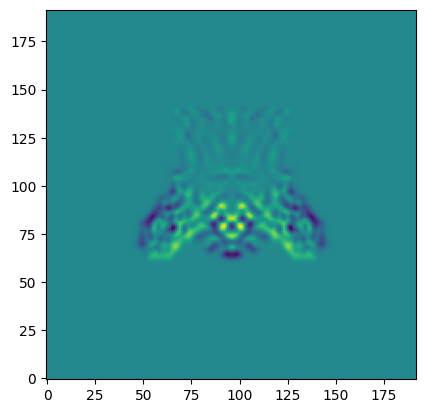

In [20]:
# # print(mask.reshape([360,360,360]))
# print ( type(mask))
# # s = np.sum(mask)
box_size = np.int64(np.round(((mask.shape[0]**(1/3)))))
# print(box_size)
# plt.imshow(torch.sum(mask.reshape([box_size,box_size,box_size]),axis=2))
# # plt.imshow(np.sum(mask,axis=2))
# plt.figure()

plt.imshow(torch.sum(methods_data["md_mode1"]["volumes"][1].reshape([192,192,192]),axis=1), origin='lower')




In [21]:
# with mrcfile.new ('test.mrc',overwrite=True) as f:
#     # f.set_data (np.array(methods_data["3dva_mode1"]["volumes"][0].reshape([180,180,180])))
#     # f.set_data (np.array(mask.reshape([180,180,180])))
#     f.close()
# os.getcwd()

In [22]:
distance_matrix, dist_mtx_labels = compute_distance_matrix_asymmetric(methods_data,do_sort_matrix=False)
common_embedding_results = compute_common_embedding(methods_data)

3dva_mode1
3dva_mode2
3dflex_mode1
3dflex_mode2
md_mode1
md_mode2
cryodrgn_pc1
manifoldem


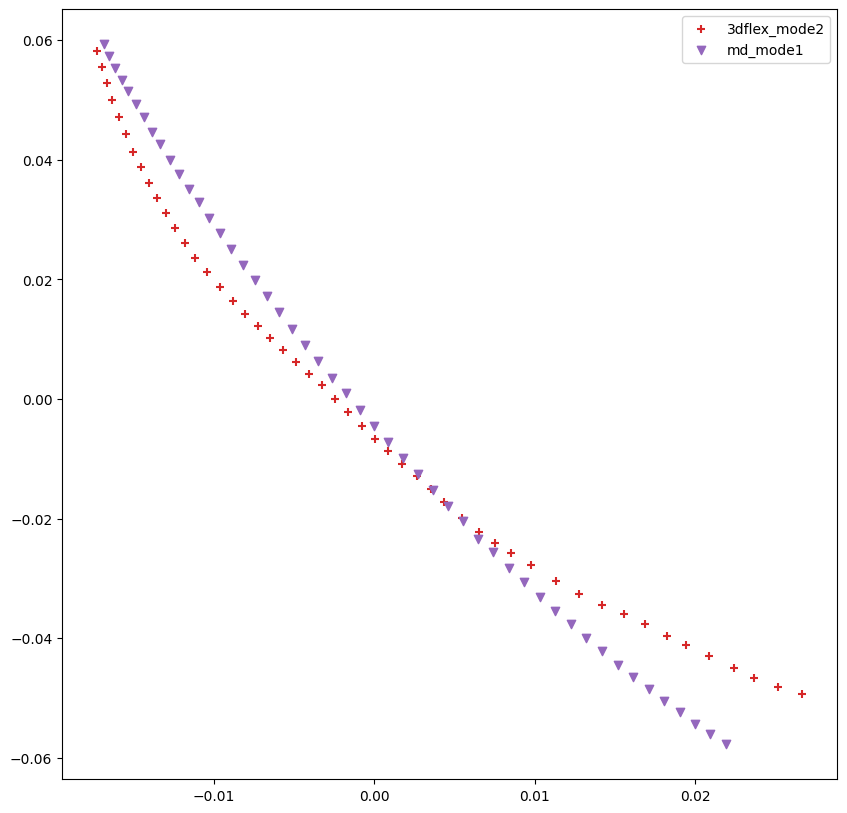

In [23]:
common_embedding = common_embedding_results["common_embedding"]

marker_list = ['x','.','3','+','v','D','1','s','2','o','4','5','D','d']
color_list = ['#1f77b4', '#bcbd22', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#ffff00', '#17becf', '#ff7f0e', '#2ca02c']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, method in enumerate(methods_data.keys()):
    print(method)
    if method == 'md_mode1' or method == '3dflex_mode2':
        if '3dva_mode1' == method:
            ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1], label=method, marker=marker_list[i], color=color_list[i],s=90)

        else:   
            ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1], label=method, marker=marker_list[i], color=color_list[i])

ax.legend()


Text(0, 0.5, 'Eigenvector 2')

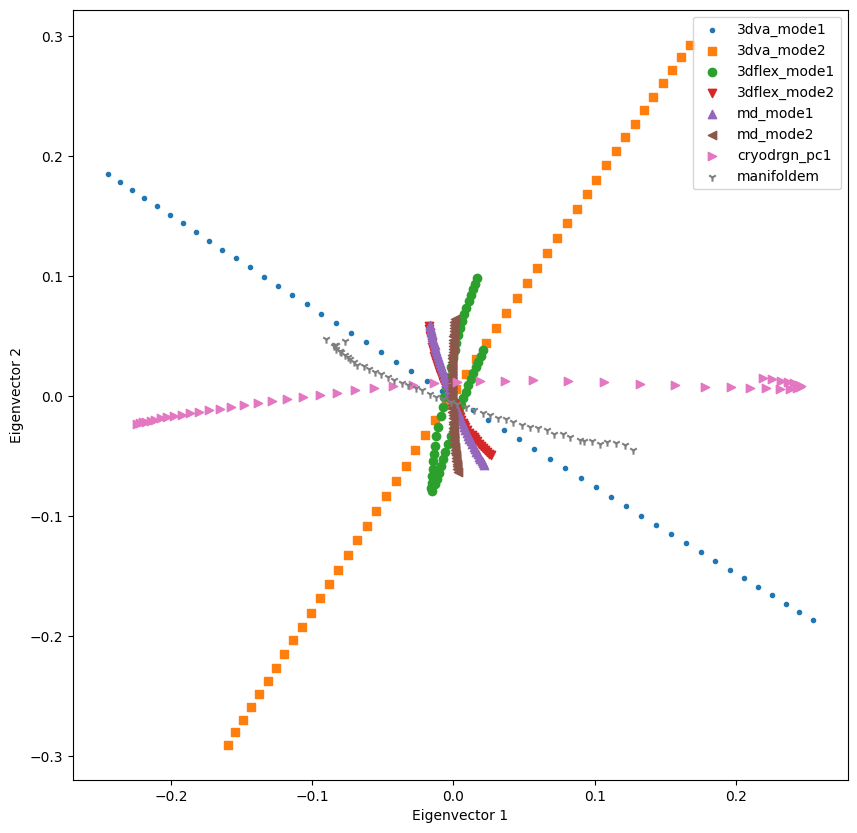

In [24]:
# marker_list = ['x','.','3','+','v','D','1','s','2','o','4','H','8',]
marker_list = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X']                                                                                                                  

# color_list = ['#1f77b4', '#bcbd22', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#ffff00', '#17becf', '#ff7f0e', '#2ca02c', '']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
pc1=0
pc2=1

for i, method in enumerate(methods_data.keys()):
    # print(method)
    # ax.scatter(common_embedding[method][:, pc1], common_embedding[method][:, pc2], marker=marker_list[i], color=color_list[i], label=method)
    ax.scatter(common_embedding[method][:, pc1], common_embedding[method][:, pc2], marker=marker_list[i], label=method)

    # ax.scatter(common_embedding[method][:, pc1], common_embedding[method][:, pc2])

ax.legend()

plt.xlabel('Eigenvector ' + str(pc1 + 1))
plt.ylabel('Eigenvector ' + str(pc2 + 1))


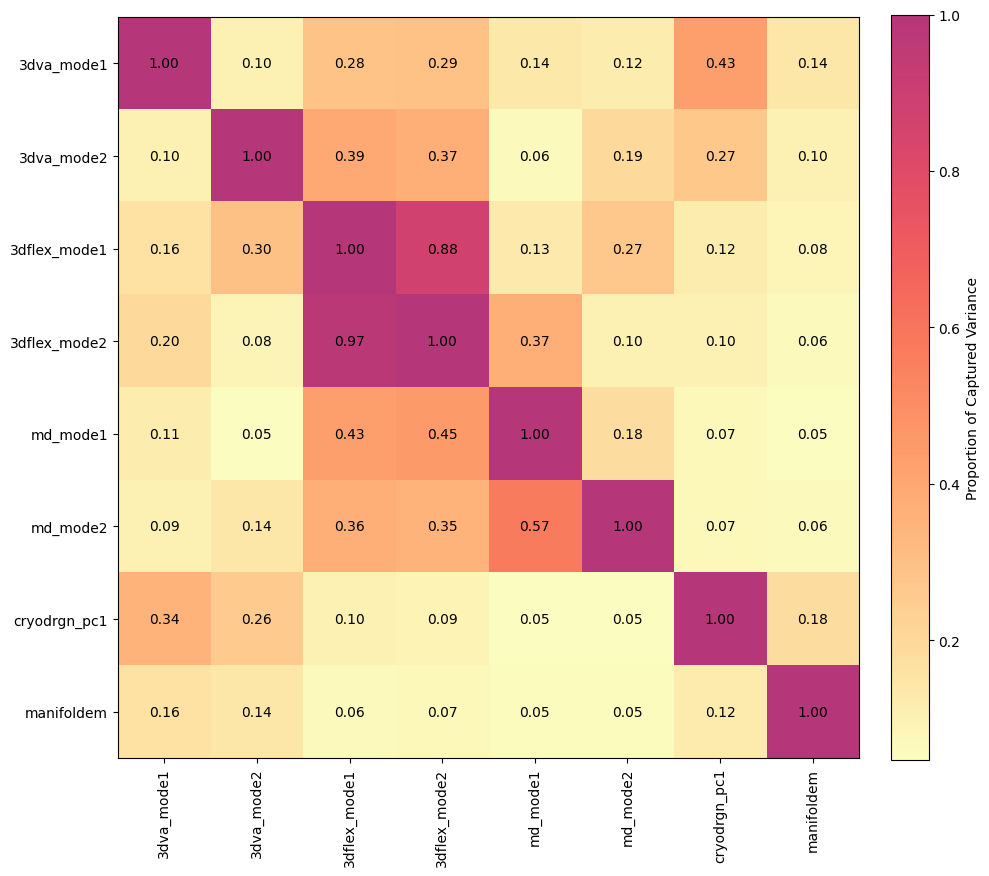

In [25]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

original_cmap = matplotlib.colormaps['magma_r']  # Get the original Magma colormap

lighter_cmap = truncate_colormap(original_cmap, maxval=0.5) 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for (j,i),label in np.ndenumerate(distance_matrix):
    ax.text(i,j,format(label,'#1.2f'),ha='center',va='center')

ax.set_xticks(range(len(methods_data.keys())), dist_mtx_labels, rotation='vertical')
ax.set_yticks(range(len(methods_data.keys())), dist_mtx_labels)

im = ax.imshow(distance_matrix,cmap=lighter_cmap)
fig.colorbar(im, cmap=lighter_cmap, label="Proportion of Captured Variance", fraction=0.046, pad=0.04)

plt.tight_layout()



In [26]:
power_spectrums = compute_power_spectrums(methods_data,2.68)

192


100%|██████████| 8/8 [03:34<00:00, 26.86s/it]


/tmp/ipykernel_954399/2787202017.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  specs_normed[i] = power_spectrums[method]['power_spectrums'] / np.mean((power_spectrums[method]['power_spectrums'][:,1].numpy()))


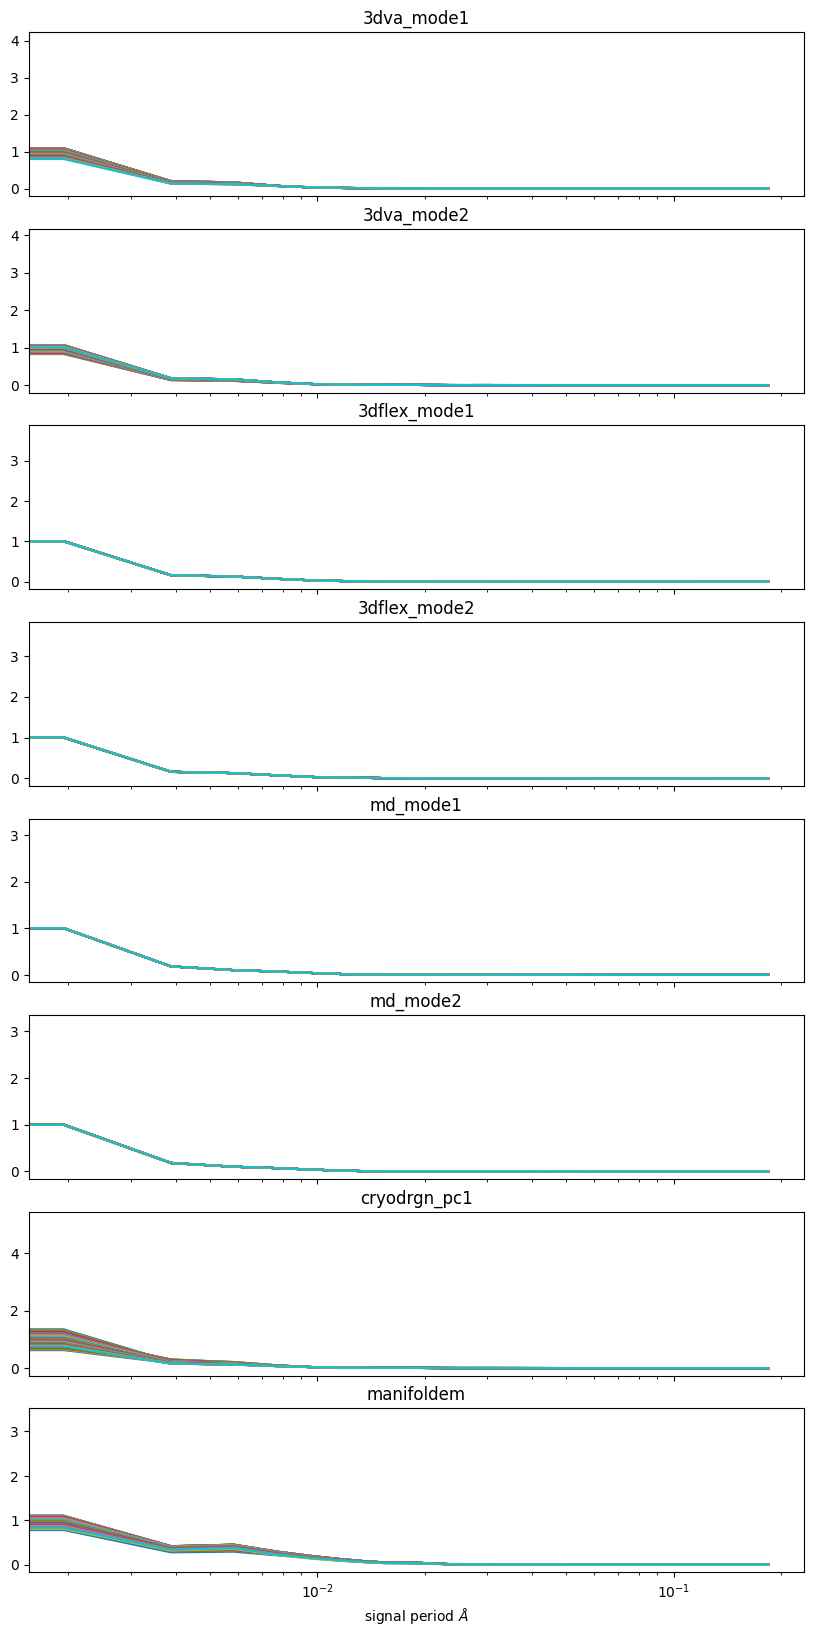

In [27]:
fig, axes = plt.subplots(len(methods_data.keys()), 1, figsize=(10, 20), sharex=True)

keys = list(power_spectrums.keys())

spec_shape = np.shape(power_spectrums[keys[0]]['power_spectrums'])
specs_normed = np.zeros([len(keys),spec_shape[0],spec_shape[1]])
# stacked_specs = torch.stack()

for i,method in enumerate(power_spectrums.keys()):
    specs_normed[i] = power_spectrums[method]['power_spectrums'] / np.mean((power_spectrums[method]['power_spectrums'][:,1].numpy()))
    # specs_normed[i] = power_spectrums[method]['power_spectrums'] / np.mean((power_spectrums[method]['power_spectrums'].numpy()))


for i,method1 in enumerate(power_spectrums.keys()):
    for j in range(len(power_spectrums[method1]['power_spectrums'])):
        axes[i].semilogx(power_spectrums[method1]['frequencies'],np.array(specs_normed[i][j])) 

        # print(np.sum(specs[i][j]))
    axes[i].set_title(keys[i])

    # axes[i].set_ylim([0,0.5])

axes[i].set_xlabel('signal period $\AA$') 

plt.show()

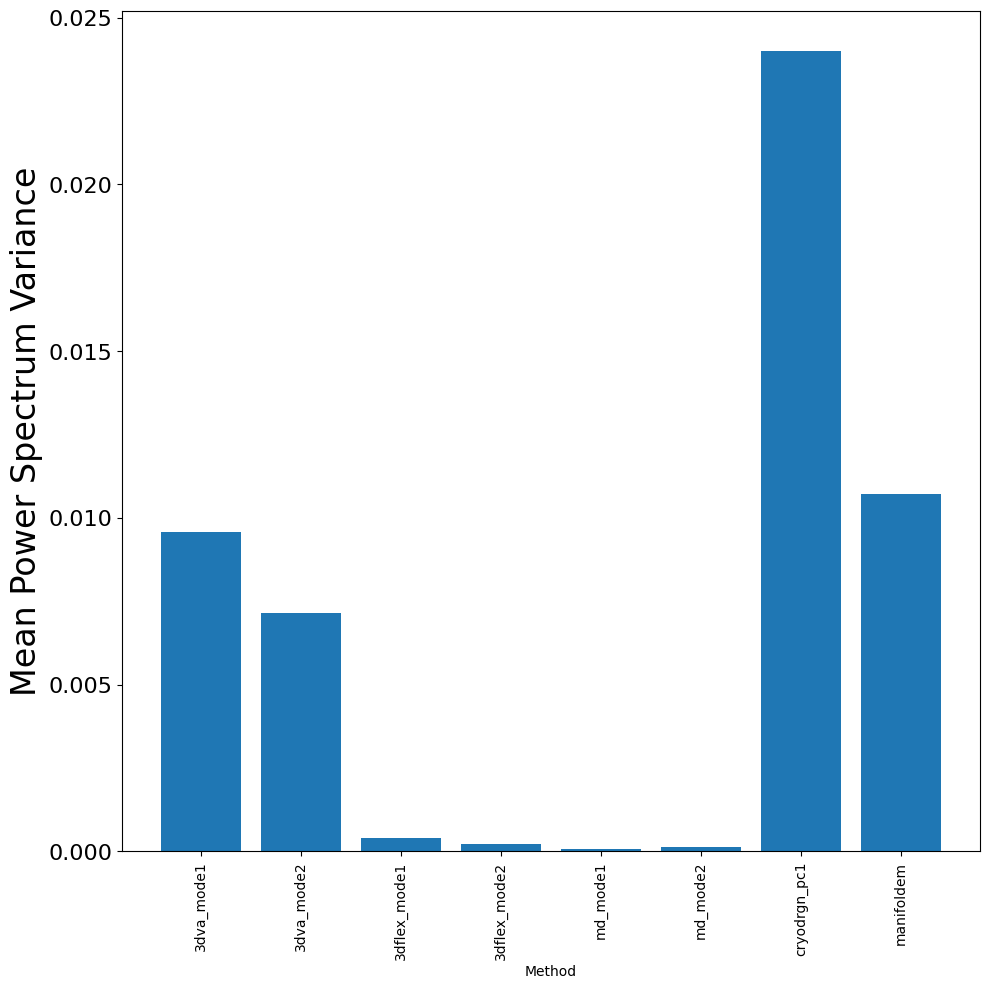

In [28]:
vars = np.array([np.sum((np.std(specs_normed[i],axis=0))) for i in range(len(specs_normed))])/np.shape(specs_normed)[1]
fig = plt.figure(figsize=(10,10))
plt.yticks(fontsize=16)
plt.bar (methods_data.keys(), (vars)) 

plt.ylabel('Mean Power Spectrum Variance',fontsize=24)
plt.xticks(rotation=90)
plt.xlabel('Method')

plt.tight_layout()

plt.show()
